In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
data = pd.read_json("./folder/data.json")
del data["level_0"]
del data["index"]
data=data.reset_index()
data= data[data["Switch Order"] == "2-2-0-5-6"]
sample = data.sample()

## Validating the phases function

In [4]:
def ref_sampler(iq: list):
    data = []
    for i in range(0,16,2):
        data.append(np.angle(complex(iq[i],iq[i+1])))
    return np.array(data)

In [5]:
# Validating the phases func
iq= sample["iq"].iloc[0]
sample_phases = [ np.angle(complex( iq[i],iq[i+1] )) for i in range(0,len(iq)-1,2) ]

In [6]:
#sample ref
ref_sampler(sample["iq"].iloc[0]) == sample_phases[:8]

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Validating  PM function

In [7]:
def pm(x:float):
    #Keeps the angle between +- pi
    return (x + np.pi) % (2 * np.pi) - np.pi #coomentg - np.pi to keep it between 0 => 2pi

In [8]:
#170 +50 = 220 => -140
np.rad2deg(pm(np.deg2rad(170+50)))

-140.0

In [9]:
#-90 -120 = -210 => -150
np.rad2deg(pm(np.deg2rad(-90 -120)))

149.99999999999997

In [10]:
#-20 -360 - 360 = -740 => -20
np.rad2deg(pm(np.deg2rad(-20 -360 -360)))

-19.99999999999998

In [11]:
pm = np.vectorize(pm)

## Validanting antenna phases function

In [12]:
# switch pattern => 0-5-6 (12,1,2)
# 0: 16/17, 22/23
# 5: 18/19, 24/25
# 6: 20/21, 26,27
# step => 6

def antenna_phases(iq:list, start, step=6):
    #split phases for each corresponding antenna
    data =[]
    for i in range(start,len(iq)-1,step):
        print(i)
        data.append(
            np.angle(complex(iq[i],iq[i+1]))
        )
    return np.array(data)

In [13]:
# first antenna 
s=antenna_phases(iq,16)

16
22
28
34
40
46
52
58
64
70
76
82


In [14]:
# second antenna 
s=antenna_phases(iq,18)

18
24
30
36
42
48
54
60
66
72
78


In [15]:
# third antenna 
s=antenna_phases(iq,20)

20
26
32
38
44
50
56
62
68
74
80


In [16]:
# switch pattern => 0-5-6 (12,1,2)
# 0: 16/17, 22/23
# 5: 18/19, 24/25
# 6: 20/21, 26,27
# step => 6

def antenna_phases(iq:list, start, step=6):
    #split phases for each corresponding antenna
    data =[]
    for i in range(start,len(iq)-1,step):
        #print(i)
        data.append(
            np.angle(complex(iq[i],iq[i+1]))
        )
    return np.array(data)

In [17]:
data["pref"] = data["iq"].apply(ref_sampler)
data["p1"] = data["iq"].apply(antenna_phases,start=16)
data["p2"] = data["iq"].apply(antenna_phases,start=18)
data["p3"] = data["iq"].apply(antenna_phases,start=20)

#first antenna has 1 more sample
data["p1"] =  data["p1"].apply(lambda x: x[:11])

data

,index,timestamp,rssi,frequency,iq,Switch Order,Angle,Antenna,TAG,Entrada,pref,p1,p2,p3
9096,9096,2024-08-22 15:16:16.275000+00:00,-67,2426,"[-142, -137, 120, -126, 126, 139, -167, 104, -...",2-2-0-5-6,0,1,A,1,"[-2.374113718952003, -0.8097835725701669, 0.83...","[-3.1244023699890597, 0.29201954061992613, -2....","[-2.339560165086297, 1.2942492071802545, -1.48...","[-2.494920308070028, 1.040504177328581, -1.707..."
9097,9097,2024-08-22 15:16:16.779000+00:00,-58,2402,"[-80, 141, -131, -103, 101, -130, 118, 114, -1...",2-2-0-5-6,0,1,A,1,"[2.086882006832048, -2.475286375441511, -0.910...","[2.5894396631342893, -0.17380111908918636, -2....","[2.5262531117844014, -0.34500217720710513, -3....","[2.7041780923641787, -0.02547219651072259, -2...."
9098,9098,2024-08-22 15:16:17.292000+00:00,-62,2480,"[-191, 41, -39, -193, 189, -37, 18, 189, -200,...",2-2-0-5-6,0,1,A,1,"[2.930141794461651, -1.7701839158823727, -0.19...","[2.2157118618019473, -0.44099776135465124, 3.0...","[2.918561685218235, 0.20333608402827574, -2.40...","[-2.4756234162106834, 1.1441688336680205, -1.5..."
9099,9099,2024-08-22 15:16:17.797000+00:00,-65,2426,"[-124, 130, -114, -138, 137, -130, 113, 136, -...",2-2-0-5-6,0,1,A,1,"[2.3325768351873943, -2.2612427838495885, -0.7...","[1.5459787281772228, -1.1410340476982082, 2.46...","[2.4309448208736515, -0.31213546609693965, -3....","[2.2930467110880133, -0.4903474940060718, 3.08..."
9100,9100,2024-08-22 15:16:18.251000+00:00,-61,2480,"[-181, -66, 63, -189, 179, 69, -84, 168, -152,...",2-2-0-5-6,0,1,A,1,"[-2.7919347322783543, -1.2490457723982544, 0.3...","[2.8305943729842524, 0.1959811336361145, -2.68...","[-2.7297853482280767, 0.8404605587711186, -1.8...","[-1.7590178320996674, 1.5042281630190728, -1.1..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18957,18957,2024-08-23 10:24:15.812000+00:00,-55,2402,"[180, -64, 5, 186, -196, -9, 31, -183, 171, 88...",2-2-0-5-6,90,2,C,2,"[-0.34161549064780716, 1.5439210787101398, -3....","[3.141592653589793, 0.9588938923602299, -1.311...","[0.6479307586687755, -1.554038119212659, 2.602...","[-2.1995926132103296, 1.8249807137550402, -0.3..."
18958,18958,2024-08-23 10:24:16.305000+00:00,-56,2426,"[148, 115, -134, 131, -116, -141, 163, -84, 63...",2-2-0-5-6,90,2,C,2,"[0.660575223166546, 2.367514761325804, -2.2592...","[-2.1763409903998667, 1.8055189392800937, -0.3...","[1.413120336369888, -0.6212445105300607, -3.00...","[-1.3351024479214708, 2.7682907627771343, 0.48..."
18959,18959,2024-08-23 10:24:16.820000+00:00,-62,2480,"[-64, 153, -151, -87, 113, -133, 125, 117, -13...",2-2-0-5-6,90,2,C,2,"[1.966978911273798, -2.618887835505054, -0.866...","[-0.9532040533357405, -3.026716048172894, 0.90...","[2.8037144653495147, 0.6128202021652414, -1.59...","[0.28297689337281756, -1.968670684412066, 2.25..."
18960,18960,2024-08-23 10:24:17.334000+00:00,-63,2480,"[-155, -6, 6, -159, 158, 64, -86, 160, -110, -...",2-2-0-5-6,90,2,C,2,"[-3.1029022935043, -1.5330783743280325, 0.3848...","[0.5841785304099635, -1.7008277031365882, 2.18...","[-2.2477111786373736, 2.0971886910213167, -0.1...","[1.6156380418737804, -0.6534263411807619, -2.6..."


# Validating the ref angle step; Expected to be around 90

Sem outliers:  
 mean = 96.16523779676554 
 std = 3.764054185075677


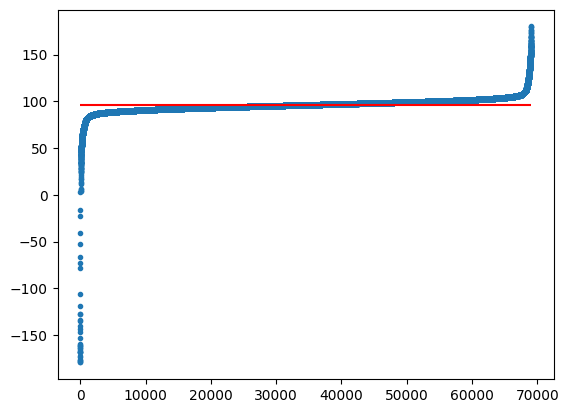

In [18]:
# we will always do ahead - before
pstep = data["pref"].apply(lambda x: np.rad2deg(pm(x[1:]-x[:-1])))
pstep = np.concatenate(pstep.to_numpy())
pstep.sort()
plt.plot(pstep,".")
plt.hlines(pstep[5000:65000].mean(),0,len(pstep),'r')
print(f"Sem outliers:  \n mean = {pstep[5000:65000].mean()} \n std = {pstep[5000:65000].std()}")

In [19]:
data["step"] = data["pref"].apply(lambda x: (pm(x[1:]-x[:-1])).mean())

## Phase diff between each antenna



In [20]:
#1 and 2
data["p1"].iloc[0][0]

-3.1244023699890597

In [21]:
data["p2"].iloc[0][0]


-2.339560165086297

In [22]:
pm(data["p2"].iloc[0][0]-data["p1"].iloc[0][0]) == pm((data["p2"]-data["p1"]).iloc[0][0])

True

In [23]:
data["p2-p1"] = ((data["p2"]-data["p1"])).apply(pm)
data["p3-p2"] = ((data["p3"]-data["p2"])).apply(pm)
data["p3-p1"] = ((data["p3"]-data["p1"])).apply(pm)

In [24]:
#aoa = arccos((phi*c)/(2pi*d*f))
sample = data.sample()
sample

,index,timestamp,rssi,frequency,iq,Switch Order,Angle,Antenna,TAG,Entrada,pref,p1,p2,p3,step,p2-p1,p3-p2,p3-p1
14570,14570,2024-08-23 10:30:36.184000+00:00,-65,2402,"[2, -216, 208, 53, -86, 198, -183, -127, 148, ...",2-2-0-5-6,180,2,C,2,"[-1.5615373321327735, 0.24949840636135495, 1.9...","[1.3473197256542635, -0.7714130612325663, -2.9...","[1.556037250944876, -0.6598484262889226, -2.95...","[0.9188468782992611, -1.2820287305981748, 2.79...",1.739042,"[0.20871752529061283, 0.11156463494364388, 0.0...","[-0.6371903726456152, -0.6221803043092522, -0....","[-0.42847284735500235, -0.5106156693656088, -0..."


In [25]:
data["aoa_p2p1_no"] = (((data["p2-p1"]-np.pi/2)*3e8)/(2*np.pi*50e-3*data["frequency"]*1e6)).apply(lambda x: np.rad2deg(np.arccos(np.clip(x,-1,1))))


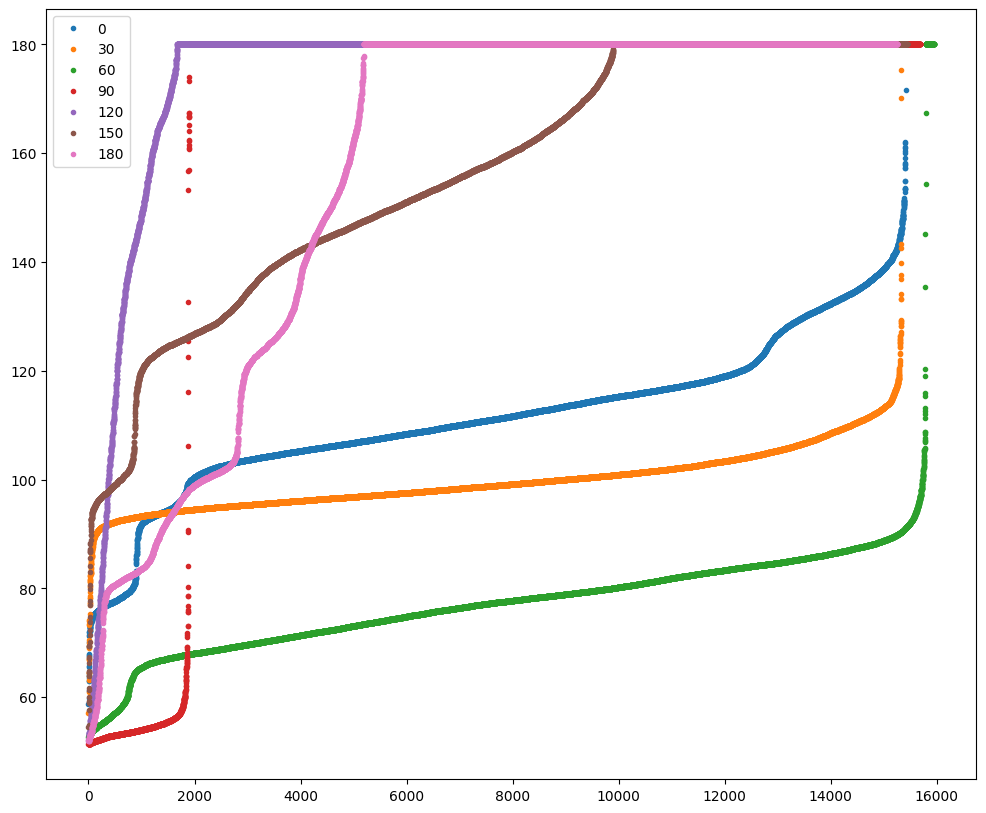

In [26]:
plt.figure(figsize=(12,10))
for angle in range(0,210,30):
    aoas = data[data["Angle"] == angle]["aoa_p2p1_no"]
    aoas= np.concatenate(aoas.to_numpy())
    aoas.sort()
    plt.plot(aoas,".")

plt.legend([*range(0,210,30)])

In [27]:
str(angle)data["aoa_p2p1_no"]

SyntaxError: invalid syntax (2817173439.py, line 1)

In [508]:
data["aoa_p2p1_no"]

9096     [72.00511869894508, 66.76515888789822, 70.7038...
9097     [91.43943265113576, 93.90268351517764, 96.9570...
9098     [74.29800725579796, 75.63476044469608, 70.9958...
9099     [69.61399464391016, 70.95724433177736, 71.8691...
9100     [73.84016026054192, 75.63144499801507, 72.1839...
                               ...                        
18957    [172.4673851357574, 177.47793856800664, 160.37...
18958    [180.0, 162.7906648581977, 180.0, 175.67844546...
18959    [166.59231637845332, 180.0, 163.68964419718068...
18960    [180.0, 163.1209788060048, 154.36711007845526,...
18961    [169.745991830652, 180.0, 170.87689810756444, ...
Name: aoa_p2p1_no, Length: 9866, dtype: object

In [28]:
(len(data["iq"].iloc[0])/2 - 8 ) // 6

5.0

In [29]:
( len(data["iq"].iloc[0])/2 - 8 ) % 6

4.0

In [29]:
len(data["iq"].iloc[0])/2-





34.0